In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = {'Name': ['John', 'Alice', 'Bob', 'Emily'],
        'Age': [25, 30, 28, 35],
        'City': ['New York', 'Paris', 'London', 'Tokyo']}
df = pd.DataFrame(data)
df.head()

,Name,Age,City
0,John,25,New York
1,Alice,30,Paris
2,Bob,28,London
3,Emily,35,Tokyo


In [14]:
# Adding new data
new_data = {'Name': 'Gerald', 'Age': 29, 'City': 'New York'}
# Old way of appending in earlier versions now removed
#df = df.append(new_data, ignore_index=True)
df = pd.concat([df, pd.DataFrame([new_data])], ignore_index=True)
df.head()

,Name,Age,City
0,John,25,New York
1,Alice,30,Paris
2,Bob,28,London
3,Emily,35,Tokyo
4,Gerald,29,New York


In [16]:
# Updating the data
df.loc[df['Name'] == 'Gerald', 'Age'] = 35
df.head()

,Name,Age,City
0,John,25,New York
1,Alice,30,Paris
2,Bob,28,London
3,Emily,35,Tokyo
4,Gerald,35,New York


In [17]:
# Deleting data
df = df.drop(index=0)
df.head()

,Name,Age,City
1,Alice,30,Paris
2,Bob,28,London
3,Emily,35,Tokyo
4,Gerald,35,New York


In [18]:
# Sorting values
df = df.sort_values(by=['Age'], ascending=False)
df.head()

,Name,Age,City
3,Emily,35,Tokyo
4,Gerald,35,New York
1,Alice,30,Paris
2,Bob,28,London


In [20]:
# Filtering values
filtered_df = df[df['Age'] >= 35]
filtered_df.head()

,Name,Age,City
3,Emily,35,Tokyo
4,Gerald,35,New York


In [21]:
data2 = {'Name': ['John', 'Alice', 'Bob'],'Salary': [5000, 6000, 4500]}
df2 = pd.DataFrame(data2)
df2.head()

,Name,Salary
0,John,5000
1,Alice,6000
2,Bob,4500


In [22]:
# Joining and merging of data
merged_df = pd.merge(df, df2, how='left', on='Name')
merged_df.head()

,Name,Age,City,Salary
0,Emily,35,Tokyo,NaN
1,Gerald,35,New York,NaN
2,Alice,30,Paris,6000.0
3,Bob,28,London,4500.0


In [23]:
# Transforming data
df['City'] = df['City'].str.upper()
df.head()

,Name,Age,City
3,Emily,35,TOKYO
4,Gerald,35,NEW YORK
1,Alice,30,PARIS
2,Bob,28,LONDON


In [24]:
# Handling Missing data
'''
    1. Dropping Missing values
    2. Ignore missing values
    3. Imputation
'''
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [6, 7, 8, 9, np.nan],
    'C': [10, np.nan, 12, 13, 14]
}
df = pd.DataFrame(data)
print(df.head())

# Dropping missing values
df_dropped = df.dropna() # Dropping rows with missing values
df_dropped_columns = df_dropped.dropna(axis=1) # Dropping columns missing values
print(f'Dropped Columns: \n{df_dropped_columns.head()}')
print(f'Dropped Rows: \n{df_dropped.head()}')

# Ignore tuples
df_ignore = df.dropna(how='any')
print(f'Ignore Columns: \n{df_ignore.head()}')

# Imputation
df_imputed_mean = df.fillna(df.mean())
print(f'Imputed Mean: \n{df_imputed_mean.head()}')

     A    B     C
0  1.0  6.0  10.0
1  2.0  7.0   NaN
2  NaN  8.0  12.0
3  4.0  9.0  13.0
4  5.0  NaN  14.0
Dropped Columns: 
     A    B     C
0  1.0  6.0  10.0
3  4.0  9.0  13.0
Dropped Rows: 
     A    B     C
0  1.0  6.0  10.0
3  4.0  9.0  13.0
Ignore Columns: 
     A    B     C
0  1.0  6.0  10.0
3  4.0  9.0  13.0
Imputed Mean: 
     A    B      C
0  1.0  6.0  10.00
1  2.0  7.0  12.25
2  3.0  8.0  12.00
3  4.0  9.0  13.00
4  5.0  7.5  14.00


In [30]:
# Noisy Data
'''
    The noisy data can cause the miss out relationship between target and features, their occurrences can significantly
    impact prediction of any useful information. and cause algorithm to miss out patterns in the data.
'''
data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000]
}
df = pd.DataFrame(data)

# 1. Binning
df['AgeBin'] = pd.cut(df['Age'], bins=[0,30,40,50,100], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])
print(f'Binned Ages: \n{df.head()}')

# 2. Regression
from sklearn.linear_model import LinearRegression
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 6, 8, 10])

regression = LinearRegression()
regression.fit(X, y)

X_new = np.array([6,7,8]).reshape(-1, 1)
predictions = regression.predict(X_new)
print(f'Predicted Values: \n{predictions}')

# 3. Clustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100, centers=3, random_state=0)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

new_data = np.array([[0,0], [4,4]])
predictions = kmeans.predict(new_data)
print(f'Kmeans Prediction: \n{predictions}')

Binned Ages: 
   Age  Income       AgeBin
0   25   50000        Young
1   30   60000        Young
2   35   70000        Adult
3   40   80000        Adult
4   45   90000  Middle-Aged
Predicted Values: 
[12. 14. 16.]
Kmeans Prediction: 
[1 1]


   Feature1  Feature2 Context
0         1         5       A
1         2         6       A
2         3         7       A
3         4         8       A
4      1000      2000       B


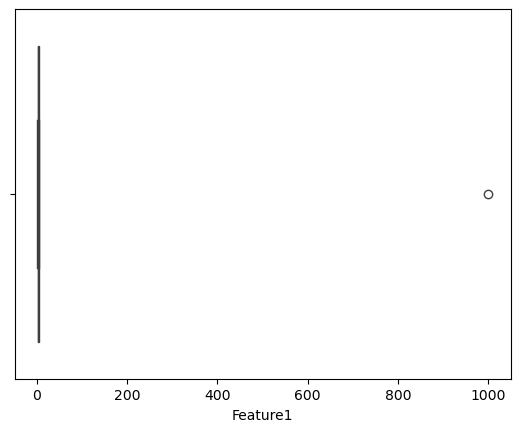

(array([], dtype=int64),)


KeyError: 'Feature1'

In [51]:
# Continuation
# Outliers
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import zscore
from sklearn.cluster import DBSCAN
import seaborn as sns

data = {
    'Feature1': [1, 2, 3, 4, 1000],
    'Feature2': [5, 6, 7, 8, 2000],
    'Context': ['A', 'A', 'A', 'A', 'B']
}
df = pd.DataFrame(data)
print(df.head())

# 1. Global Outlier
sns.boxplot(x=df['Feature1'])
plt.show()
global_outliers = []
z_scores = zscore(df['Feature1'])
outliers = np.where(np.abs(z_scores) > 3)
print(outliers)

# 2. Contextual Outlier
def calculate_contextual_zscores(group):
    return zscore(group['Feature1'])

df['Z_Score_Feature1'] = df.groupby('Context')['Feature1'].transform(calculate_contextual_zscores)

# Identify outliers
outliers = df[np.abs(df['Z_Score_Feature1']) > 3]
print("Outliers:\n", outliers)

# 3. Collective Outlier
X = df.drop('Context', axis=1)
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan.fit(X)
collective_outliers = np.where(dbscan.labels_ == -1)[0]
print(f'DBSCAN Outliers: \n{collective_outliers}')

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [41]:
cols = X.columns.tolist()[:-2]
cols

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

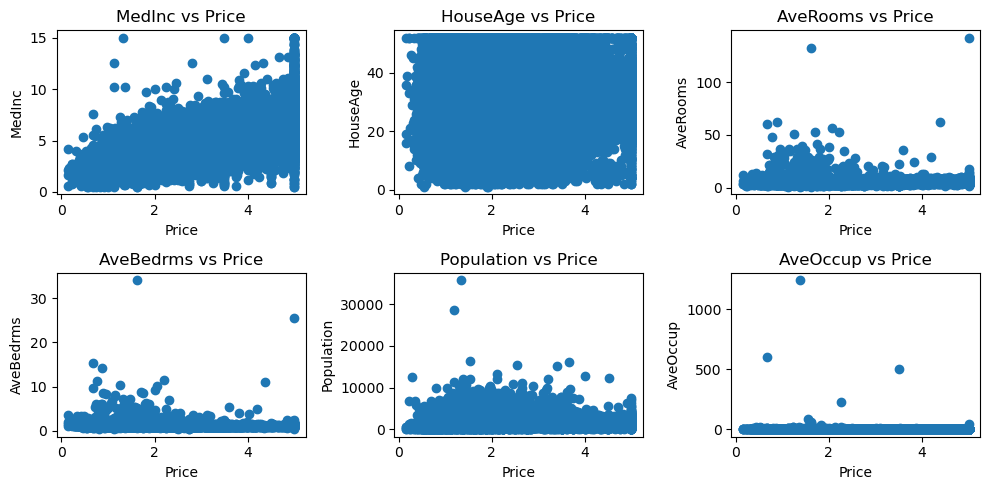

In [42]:
fig, ax = plt.subplots(2,3, figsize=(10,5))
ax = ax.ravel()
for i, k in enumerate(cols):
    ax[i].scatter(y, X[k])
    ax[i].set_title(f'{cols[i]} vs Price')
    ax[i].set_xlabel(f'Price')
    ax[i].set_ylabel(f'{cols[i]}')
plt.tight_layout()
plt.show()

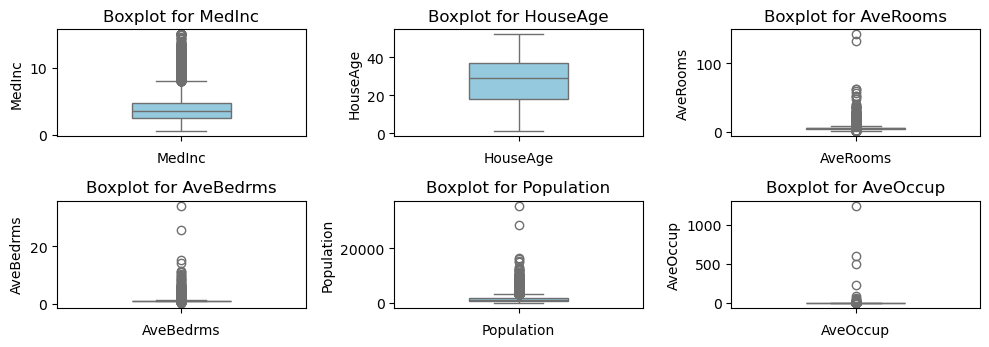

In [43]:
# Outlier detection using boxplot
import seaborn as sns
selected_columns = [col for col in X.columns if col not in ['Latitude', 'Longitude']]
plt.figure(figsize=(10,5))
for i, col in enumerate(selected_columns, start=1):
    plt.subplot(3,3,i)
    sns.boxplot(y=X[col], width=0.4, color='skyblue')
    plt.xlabel(col)
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

In [44]:
# Outlier using z score
z_scores = np.abs(zscore(X['Population']))
outlier_indices = np.where(np.abs(z_scores) > 3)
outlier_indices

(array([  283,   570,   576,   780,   799,   864,   865,   867,   869,
          871,   922,   985,   995,  1010,  1021,  1039,  1060,  1086,
         1560,  1642,  1700,  1930,  2025,  2119,  2294,  2311,  2963,
         2975,  2978,  2999,  3004,  3167,  3177,  3413,  3554,  3560,
         3603,  3607,  3621,  3648,  3829,  3871,  3942,  3981,  4035,
         4264,  4266,  4267,  4579,  4616,  4634,  4636,  4670,  5540,
         5724,  5815,  5921,  5924,  5963,  5964,  5968,  5983,  6055,
         6057,  6058,  6061,  6063,  6065,  6066,  6070,  6143,  6287,
         6289,  6297,  6298,  6303,  6328,  6329,  6338,  6340,  6401,
         6502,  6516,  6518,  6550,  6844,  7130,  7357,  7361,  7617,
         7864,  7907,  8467,  8468,  8520,  8716,  8717,  8728,  8804,
         8985,  8986,  9004,  9013,  9018,  9019,  9027,  9036,  9040,
         9064,  9081,  9084,  9114,  9118,  9122,  9123,  9128,  9131,
         9133,  9135,  9145,  9149,  9154,  9159,  9166,  9167,  9170,
      

In [56]:
# transformation
df = pd.DataFrame({"x":[120, 40, 3, None, None,34], "y":[17, 12, None, 23, None,56],
                   "z":[200, 216, 101, None, 8,78],
                   "a":[114, 31, None, 12, 63,32]})

df.index = ['R1', 'R2', 'R3', 'R4', 'R5','R6']
res_log = df.transform(func = ['log', 'exp'])

print(res_log)

           x                       y                       z                \
         log           exp       log           exp       log           exp   
R1  4.787492  1.304181e+52  2.833213  2.415495e+07  5.298317  7.225974e+86   
R2  3.688879  2.353853e+17  2.484907  1.627548e+05  5.375278  6.421080e+93   
R3  1.098612  2.008554e+01       NaN           NaN  4.615121  7.307060e+43   
R4       NaN           NaN  3.135494  9.744803e+09       NaN           NaN   
R5       NaN           NaN       NaN           NaN  2.079442  2.980958e+03   
R6  3.526361  5.834617e+14  4.025352  2.091659e+24  4.356709  7.498417e+33   

           a                
         log           exp  
R1  4.736198  3.232741e+49  
R2  3.433987  2.904885e+13  
R3       NaN           NaN  
R4  2.484907  1.627548e+05  
R5  4.143135  2.293783e+27  
R6  3.465736  7.896296e+13  


In [57]:
# Grouping
employees = pd.DataFrame({"Name":["A","B","C","D","E","F"], "Department":["Finance","Human Resources","Finance","Supply Chain","IT","Marketing"], "Income":[3000,6000,8000,5500,2300,4400], "Age":[20,25,30,40,21,42]})
employees.head()

,Name,Department,Income,Age
0,A,Finance,3000,20
1,B,Human Resources,6000,25
2,C,Finance,8000,30
3,D,Supply Chain,5500,40
4,E,IT,2300,21


In [66]:
employees.dtypes

Name          object
Department    object
Income         int64
Age            int64
dtype: object

1
2


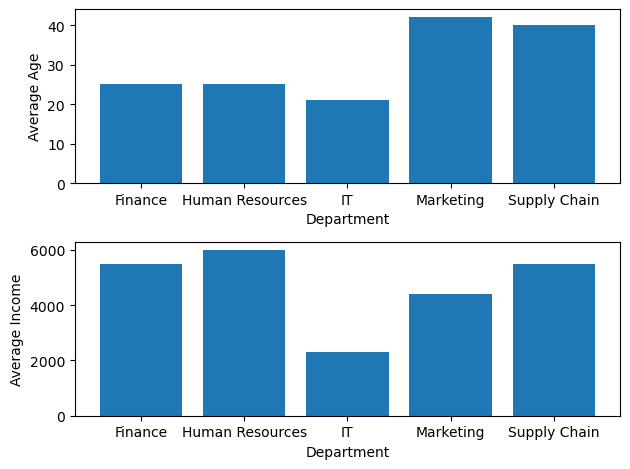

In [87]:
emp = employees.groupby('Department')[['Age', 'Income']].mean()
for i, k in enumerate(['Age', 'Income'], start=1):
    print(i)
    plt.subplot(2,1,i)
    plt.bar(emp.index, emp[k])
    plt.xlabel('Department')
    plt.ylabel(f'Average {k}')
plt.tight_layout()
plt.show()